# How the design of cities can promote social cohesion
I am currently writing a blog post on the accumulation of research into the effect of design on the social cohesion of a community. To supplement this, there were computational models that I wished to include - which will take place here. 


**Introduction From Blog Post:**

People are often coined as the *products of their environment* and tend to replicate that which is shown to them. As there is an increasing tend towards polarisation within communities and the alienation of individuals from some shared identity, is it possible for the design of an area to counter-act that. Does the environment in which you live cause you to act in a certain way? Is it possible to design an area to promote social cohesion?

I've personally been interested in this through looking at cycles of deprivation, the evolution of cities and the general changing attitudes felt by people societally.

Therefore, I will be presenting the accumulation of research that I have been doing into this to try and qualify this research - and come to some conclusion. For the context, I will not be directly tackling the issue but, in the demonstration of research, try to explore what has lead me to come to the conclusion of my design.

I will be exploring themes of architectural psychology, philosophy (namely ethics), systems engineering and mathematical modelling/computational physics in an attempt to come up with some applied “solution”.

# Pedestrian Flow
As an end goal, I would like to have a relatively complex model of a community and see how the implementation of different concepts - third places embedded within the community that people are "forced" to go to - can cause an increase in familiarity between people, and thus helps the development of friends in urban areas. 

More detail on my concept will be in the blog, this will explore how a simple model of this can be approximated to have an inference of how this can be applied in real life -- as well as developing my own mathematical abilities and computational intuitions. 

### Optimal
*This is more detail on the optimal software and will indicate how I should structure my research and application of this.*

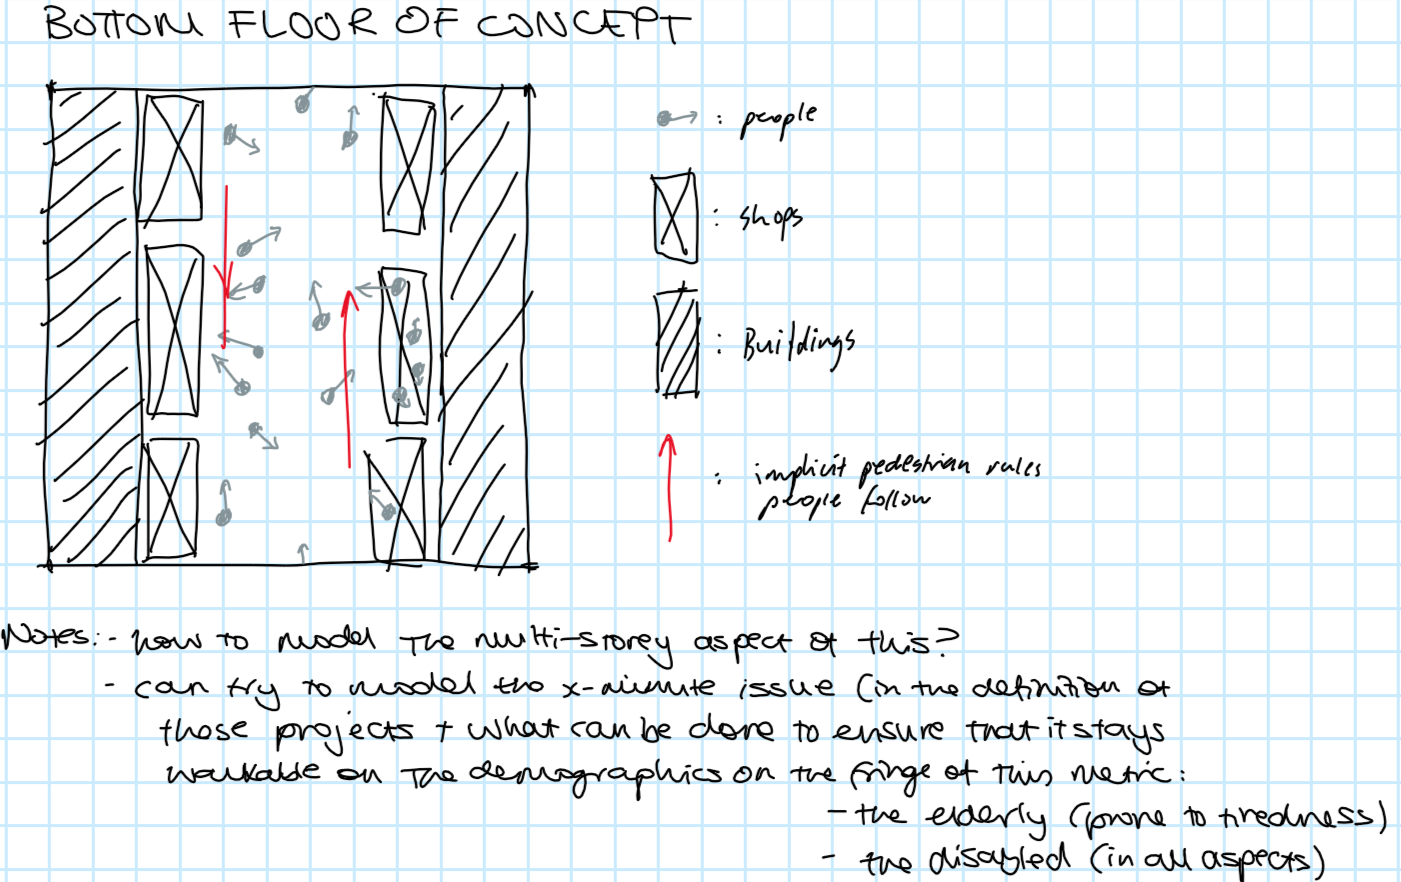

Would like to compare people's interactions within shopping of my proposed scheme and existing public centres (and the way that shops are distributed to maximise profits almost exclusively). My suggestion is to make this experience such that random interactions are implicitly welcomed in the design of these areas (whilst I can market this as fiscal localism for the designs).

In each of the models (mine against existing) each person has a certain destination in mind - although each person has randomised weights, such as some preferring to window shop and travel more freely whilst others are in a rush. I can further assign weights to the shops where this occurs more frequently as well (I'm assuming appointment based locations wouldn't be part of the pop-up design since the interaction aspect could cause conflict).

From this, I can see the parameters that allow people to gain familiarity of each other within an environment and what aspects of the model can be changed to maximise this (including random noise and other aspects (like the percieved safety of an area and other points to research)).


**Resources To Look Into:**

*Remember to add onto this list as I continue so that this becomes extensive (and I can cross off what has been completed)*
- Mehdi Moussaid's paper on how people behave in crowds (and wrt each other)
- Pathfinding algorithms (with heuristic approaches) to have an initial intuition to this in reality
- At what point to people start feeling comfortable around each other?
- How to model individual risk (or perception) in an ABM? 

### Model I: Simple Pedestrian Flow
Have a population (n) aggregate to a desired destination in the 2D plane.

##### Pseudocode
1. Start with a 4x4 matrix, and the points on that matrix want to aggregate towards the top left. It could look something like this:
$$
\begin{bmatrix}
2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

2. Points will be randomly dispersed across the grid as shown:
$$
\begin{bmatrix}
2 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

3. Will ultimately end up at that target destination: 
$$
\begin{bmatrix}
6 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Within this, there is: an agent, a grid and the running of the simulation. All of these needs classes to run efficiently.

To begin with, only use position vectors and then go into pygame or matplotlib.animation for this working better.

In [ ]:
### INTENTIONS ###

# 1. To have random vectors moving towards a fixed point in the field. (personal research)
# 2. To have their velocities and accelerations vary (personal research)
# 3. To have their velocities and accelerations vary wrt those around it (boid simulation, use tutorial)


# import modules
import matplotlib.pyplot as plt
import random
import matplotlib.animation as anim
import numpy as np

# define subplot and parameters
fig, ax = plt.subplots()
ax.set(xlim = [-1, 5], ylim =[-1,5], xlabel='x-axis', ylabel='y-axis')

# define goal coordinate
goal = [0,0]


# define Agent class
class Agent:
    def __init__(self, x, y):
        self.position = [x,y]
    def movement(self):
        # moving to the goal
        self.position[0] += (goal[0] - (self.position[0]*random.uniform(-1,1)))
        self.position[1] += (goal[1] - (self.position[1]*random.uniform(-1,1)))
        return self.position
# 
body = Agent(2,4)
position_matrix = [] 
scat_pos = ax.scatter(body.position[0], body.position[1])

def update(i): # where i is the frame interval called by the animation function
    move = body.movement()
    current_position = np.array([move[0], move[1]])
    scat_pos.set_offsets(current_position)
    return scat_pos,

ani = anim.FuncAnimation(fig=fig, func=update, frames=400, interval=30)
plt.show()

#### Pathfinding Algorithms
*Should understand the basics of pathfinding algorithms. Then, when learning other techniques like boid simulations/methods of emergence, I can apply this to that.*

*Heuristic pathfinding is the true end goal (it emulates how people behave in environments and with all interactions, using immediate data to inform later predictions until they become hard wired), and thus I want how the people to interact in this model to replicate that.*

Start with the Dj algo, then go onto A*.
https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#:~:text=Dijkstra%27s%20algorithm%20(%2F%CB%88da%C9%AA,and%20published%20three%20years%20later.


#### Boid Simulation
*My intention for learning this is to have an initial intuition on the emergence of complexity in computational models and since pedestrian flow a few set of rules that can approximate their movement (in an abstract form), this is a good starting point.*

https://youtu.be/woTqSlyJP7Q?si=z-oNLEcH4Jfrv9o2: *This tutorial seems clear but uses the complex plane for its calculations so I am not sure*.

#### Gravity/Fields Physics Model
*This can then be scaffolded for **Social Force Models** later on*